# 1. **Preprocessing Data**

## **1.1 Import libraries, load data, and inspecting data**

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mutual_info_score
%matplotlib inline

In [76]:
# load data
df_leads = pd.read_csv('/kaggle/input/leadscsv/Leads.csv')

In [77]:
len(df_leads)

9240

In [78]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [79]:
df_leads.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


In [80]:
# checking data data types
df_leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [81]:
#check for duplicates
sum(df_leads.duplicated(subset = 'Prospect ID')) == 0



True

In [82]:
#check for duplicates
sum(df_leads.duplicated(subset = 'Lead Number')) == 0



True

In [83]:
9240 * 30/100 

2772.0

In [84]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## **1.2. Data Cleaning**

In [85]:
# delete columns that have more than 3000 missing values
for i in df_leads.columns:
    if df_leads[i].isna().sum()>3000:
        df_leads.drop(i, axis=1, inplace=True)

In [86]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [87]:
# lead source
df_leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [88]:
df_leads['Lead Source'].fillna('Google', inplace=True)

In [89]:
df_leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [90]:
df_leads['Lead Source'] = df_leads['Lead Source'].str.replace('google', 'Google')
df_leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [91]:
df_leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [92]:
df_leads['Last Activity'].fillna('Other', inplace=True)

In [93]:
df_leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Other                            103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [94]:
df_leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [95]:
df_leads['City'].fillna('Select', inplace=True)

In [96]:
df_leads['City'].value_counts(dropna=False)

Select                         3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [97]:
df_leads.drop('City', axis=1, inplace=True)

In [98]:
df_leads['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [99]:
df_leads['Specialization'].fillna('Select', inplace=True)

In [100]:
df_leads['Specialization'].value_counts(dropna=False)

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [101]:
df_leads['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [102]:
df_leads['How did you hear about X Education'].fillna('Select', inplace=True)

In [103]:
df_leads['How did you hear about X Education'].value_counts(dropna=False)

Select                   7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [104]:
df_leads.drop('How did you hear about X Education', axis=1, inplace=True)

In [105]:
df_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [106]:
df_leads.drop('Country', axis=1, inplace=True)

In [107]:
df_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [108]:
df_leads['What is your current occupation'].fillna('Other', inplace=True)

In [109]:
df_leads['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [110]:
df_leads['Lead Profile'].fillna('Select', inplace=True)

In [111]:
df_leads.drop('Lead Profile', axis=1, inplace=True)

In [112]:
df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [113]:
df_leads['What matters most to you in choosing a course'].fillna('Other', inplace=True)

In [114]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [115]:
df_leads['TotalVisits'].fillna(3, inplace=True)
df_leads['Page Views Per Visit'].fillna(2, inplace=True)

In [116]:
df_leads.columns = df_leads.columns.str.lower().str.replace(' ','_')
string_columns = list(df_leads.dtypes[df_leads.dtypes=='Object'].index)

for col in string_columns:
    df_leads[col] = df_leads[col].str.lower().str.replace(' ', '_')

## **Split Dataset**

In [117]:
train_full, test_X = train_test_split(df_leads, test_size=0.2, random_state=1)

In [118]:
train_y = train_full['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

In [119]:
print(f'{len(train_y)}\n{len(test_y)}')

7392
1848


In [120]:
categorical_df = df_leads.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = df_leads.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [121]:
train_full['converted'].value_counts()

0    4560
1    2832
Name: converted, dtype: int64

In [122]:
test_X['converted'].value_counts()

0    1119
1     729
Name: converted, dtype: int64

In [123]:
global_mean = train_full.converted.mean()
round(global_mean,3)*100

38.3

In [124]:
train_full.drop(['lead_number'], axis=1, inplace=True)

In [125]:
train_full.drop(['converted'], axis=1, inplace=True)

In [126]:
train_full.drop(['prospect_id'], axis=1, inplace=True)

In [127]:
train_full

,lead_origin,lead_source,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,specialization,what_is_your_current_occupation,...,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,update_me_on_supply_chain_content,get_updates_on_dm_content,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
5321,Landing Page Submission,Google,No,No,4.0,239,4.0,Email Opened,IT Projects Management,Unemployed,...,No,No,No,No,No,No,No,No,No,Email Opened
2575,Lead Add Form,Reference,No,No,0.0,0,0.0,SMS Sent,Business Administration,Unemployed,...,No,No,No,No,No,No,No,No,No,SMS Sent
3363,Landing Page Submission,Direct Traffic,No,No,2.0,271,2.0,Email Opened,Business Administration,Other,...,No,No,No,No,No,No,No,No,Yes,Email Opened
955,API,Referral Sites,No,No,8.0,51,4.0,Olark Chat Conversation,Select,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
6406,Landing Page Submission,Direct Traffic,No,No,1.0,95,1.0,Converted to Lead,Business Administration,Other,...,No,No,No,No,No,No,No,No,Yes,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,Landing Page Submission,Organic Search,No,No,4.0,502,4.0,Email Opened,Media and Advertising,Unemployed,...,No,No,No,No,No,No,No,No,Yes,Email Opened
7813,Landing Page Submission,Google,No,No,3.0,260,3.0,Form Submitted on Website,Business Administration,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
905,API,Google,No,No,2.0,271,1.0,Email Opened,Select,Unemployed,...,No,No,No,No,No,No,No,No,No,Email Opened
5192,API,Google,No,No,2.0,444,2.0,Olark Chat Conversation,Select,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified


## 2. **Exploratory Data Analysis**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

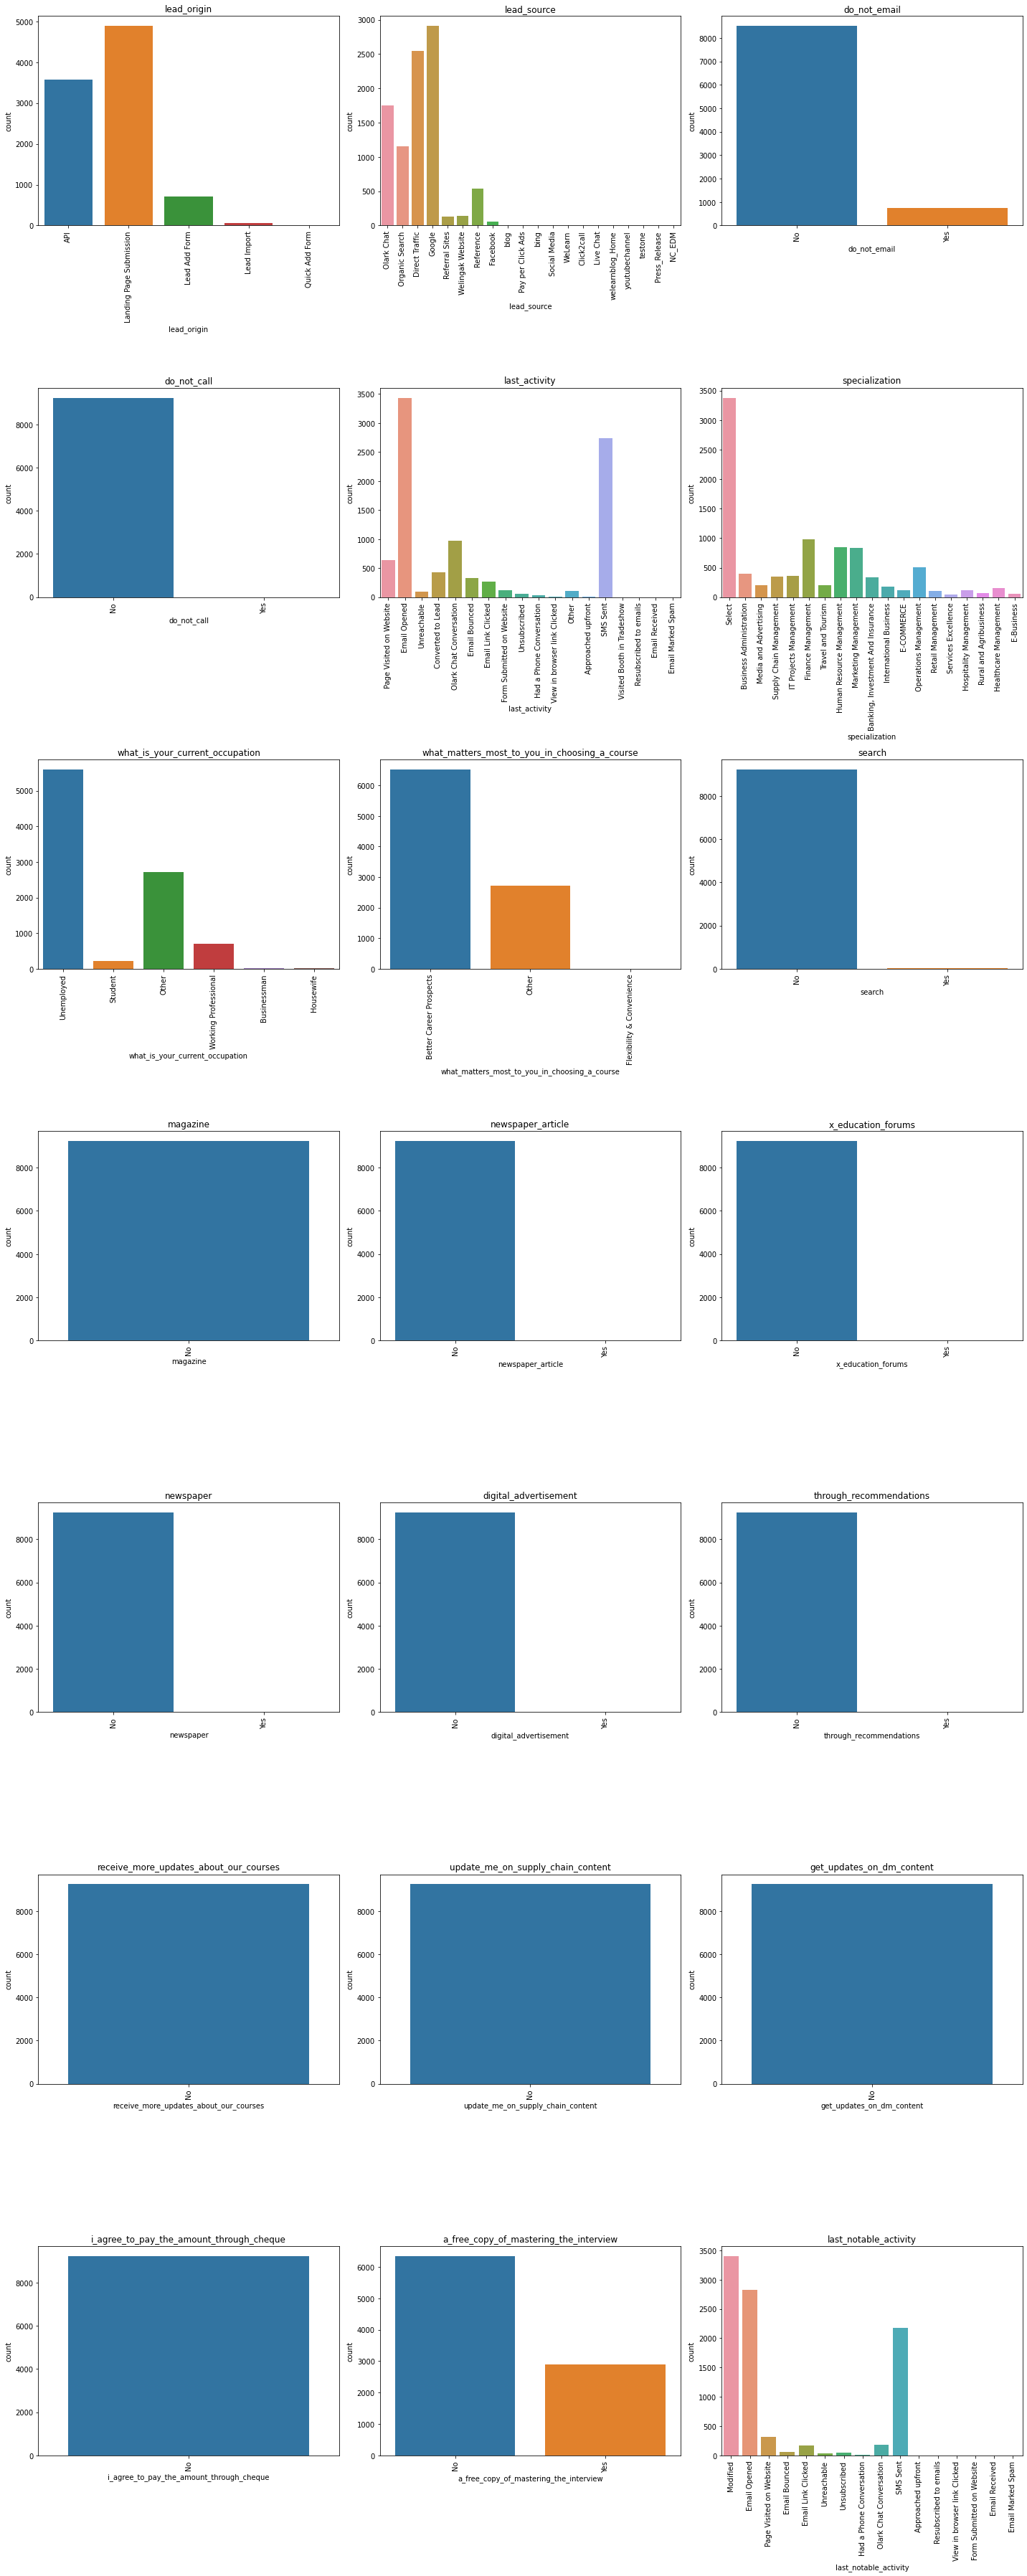

In [128]:



# Plotting count plot for the categorical variable
plt.figure(figsize=[20,50])
for i in enumerate(categorical):
    plt.subplot(7,3,i[0]+1)
    sns.countplot(i[1],data=df_leads).tick_params(axis='x',rotation=90)
    plt.title(i[1])
    plt.tight_layout()

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

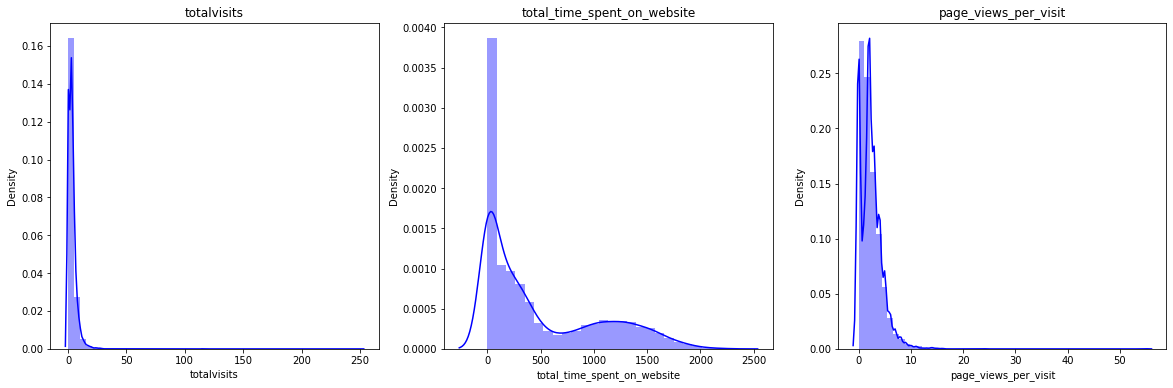

In [129]:

plt.figure(figsize=[20,6])
for i in enumerate(numerical):
    plt.subplot(1,3,i[0]+1)
    sns.distplot(df_leads[i[1]],color='b')
    plt.title(i[1])
    
plt.show()

In [130]:
print(categorical)

['lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'last_activity', 'specialization', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity']


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

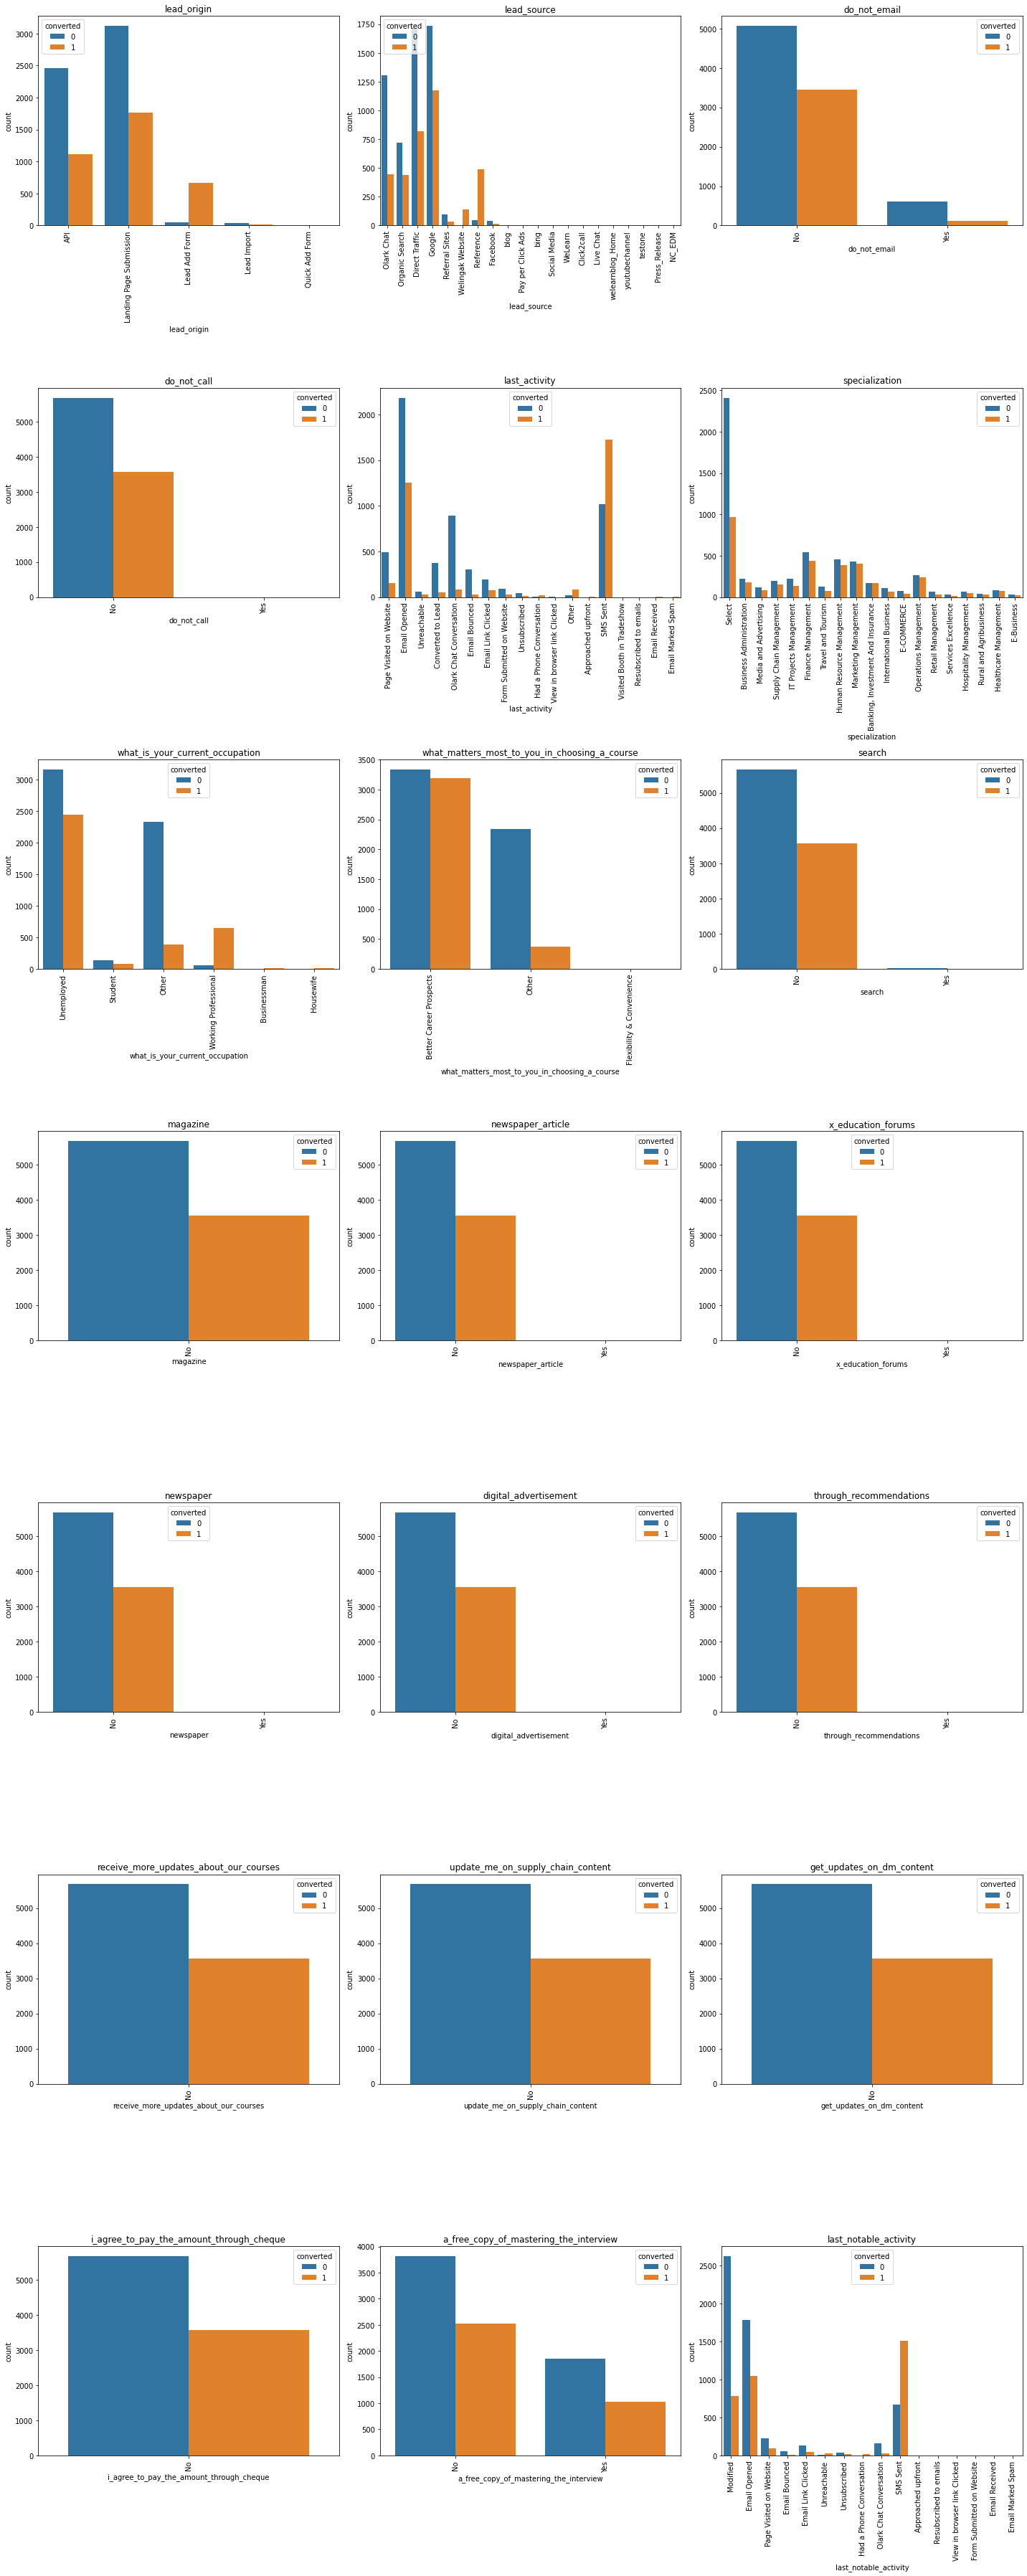

In [131]:
# Plotting count plot based on the 'converted' column

plt.figure(figsize=[20,50])
for i in enumerate(categorical):
    plt.subplot(7,3,i[0]+1)
    sns.countplot(i[1],data=df_leads,hue='converted').tick_params(axis='x',rotation=90)
    plt.title(i[1])
    plt.tight_layout()

plt.show()

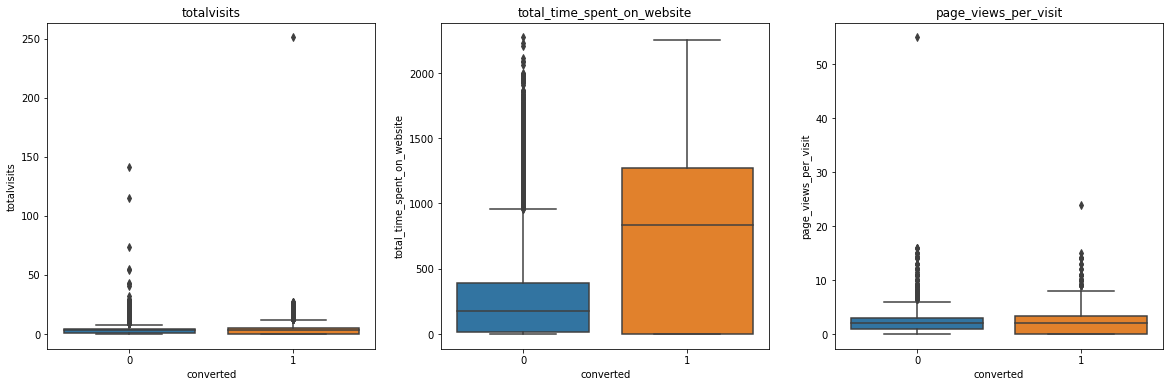

In [132]:
plt.figure(figsize=[20,6])
for i in enumerate(numerical):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(y = df_leads[i[1]],x=df_leads["converted"])
    plt.title(i[1]) 
    
plt.show()

In [133]:
def calculate_mi(series):
    return mutual_info_score(series, df_leads['converted'])

data_mi = df_leads[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')
data_mi


,Mi
what_is_your_current_occupation,0.095197
last_activity,0.088512
last_notable_activity,0.073860
lead_source,0.061560
what_matters_most_to_you_in_choosing_a_course,0.060058
lead_origin,0.056251
specialization,0.014624
do_not_email,0.010327
a_free_copy_of_mastering_the_interview,0.000797
do_not_call,0.000206


In [134]:
cat = list(data_mi.iloc[0:9,:].index)

In [135]:
df_leads[numerical].corrwith(df_leads['converted']).to_frame('Correlations')

,Correlations
totalvisits,0.029119
total_time_spent_on_website,0.362483
page_views_per_visit,-0.005068


In [136]:
train_dict = train_full[cat+numerical].to_dict(orient='records')
test_dict = test_X[cat+numerical].to_dict(orient='records')

In [137]:
train_dict[0]

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'Email Opened',
 'last_notable_activity': 'Email Opened',
 'lead_source': 'Google',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Landing Page Submission',
 'specialization': 'IT Projects Management',
 'do_not_email': 'No',
 'a_free_copy_of_mastering_the_interview': 'No',
 'totalvisits': 4.0,
 'total_time_spent_on_website': 239,
 'page_views_per_visit': 4.0}

In [138]:
test_dict[0]

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'Email Link Clicked',
 'last_notable_activity': 'Modified',
 'lead_source': 'Reference',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Lead Add Form',
 'specialization': 'Services Excellence',
 'do_not_email': 'No',
 'a_free_copy_of_mastering_the_interview': 'No',
 'totalvisits': 0.0,
 'total_time_spent_on_website': 0,
 'page_views_per_visit': 0.0}

## **One Hot Encoding using DictVectorizer**

In [139]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)

DictVectorizer(sparse=False)

In [140]:
dv.get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['a_free_copy_of_mastering_the_interview=No',
 'a_free_copy_of_mastering_the_interview=Yes',
 'do_not_email=No',
 'do_not_email=Yes',
 'last_activity=Approached upfront',
 'last_activity=Converted to Lead',
 'last_activity=Email Bounced',
 'last_activity=Email Link Clicked',
 'last_activity=Email Opened',
 'last_activity=Form Submitted on Website',
 'last_activity=Had a Phone Conversation',
 'last_activity=Olark Chat Conversation',
 'last_activity=Other',
 'last_activity=Page Visited on Website',
 'last_activity=SMS Sent',
 'last_activity=Unreachable',
 'last_activity=Unsubscribed',
 'last_activity=Visited Booth in Tradeshow',
 'last_notable_activity=Email Bounced',
 'last_notable_activity=Email Link Clicked',
 'last_notable_activity=Email Opened',
 'last_notable_activity=Had a Phone Conversation',
 'last_notable_activity=Modified',
 'last_notable_activity=Olark Chat Conversation',
 'last_notable_activity=Page Visited on Website',
 'last_notable_activity=SMS Sent',
 'last_notable_activ

In [141]:
X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)


In [142]:
X_test[0]

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0.])

In [143]:
print(len(X_train[0]))
print(len(X_test[0]))



71
71


## **Train Models**

### **Logistic Regression**

In [144]:
param_logistic = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [145]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [146]:
logistic_model = LogisticRegression(
)
logistic_model.fit(X_train, train_y.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [147]:
random_estimator = RandomizedSearchCV(estimator = logistic_model,
                                   param_distributions = param_logistic,
                                   n_iter = 10,
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver n

RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=1, verbose=1)

In [148]:
random_estimator.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.623776739188721}

In [149]:
best_logistic_model = LogisticRegression(
    random_state = 1,
    solver = 'liblinear',
    penalty = 'l1',
    C = 1.6
)


In [150]:
best_logistic_model.fit(X_train, train_y.ravel())

LogisticRegression(C=1.6, penalty='l1', random_state=1, solver='liblinear')

In [151]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, train_y.ravel())

y_pred = logistic_model.predict(X_test)
print('Accuracy:', accuracy_score(test_y, y_pred))
print('F1-score:', f1_score(test_y, y_pred))

Accuracy: 0.8176406926406926
F1-score: 0.7563268257411425


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [152]:
y_pred = best_logistic_model.predict(X_test)
print('Accuracy:', accuracy_score(test_y, y_pred))
print('F1-score:', f1_score(test_y, y_pred))

Accuracy: 0.8311688311688312
F1-score: 0.7725947521865889


### **Support Vector Machine**

In [153]:
param_svc = {
    'C':(50,100,500,1000,10000),
#     'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}


In [154]:
random_estimator = RandomizedSearchCV(estimator = SVC(),
                                   param_distributions = param_svc,
                                   n_iter = 5,
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': (50, 100, 500, 1000, 10000)},
                   random_state=1, verbose=1)

In [155]:
random_estimator.best_params_

{'C': 10000}

In [156]:
svm = SVC(C=2^32)
# best_svm_model = SVC(C=10000)

In [157]:
svm.fit(X_train, train_y.ravel())
# best_svm_model.fit(X_train, train_y.ravel())

SVC(C=34)

In [158]:
svm_y_pred = svm.predict(X_train)
# best_svm_y_pred = best_svm_model.predict(X_test)

In [159]:
print('Accuracy:', accuracy_score(train_y, svm_y_pred))
print('F1-score:', f1_score(train_y, svm_y_pred))
# print('Best Accuracy:', accuracy_score(test_y, best_svm_y_pred))
# print('Best F1-score:', f1_score(test_y, best_svm_y_pred))

Accuracy: 0.7347132034632035
F1-score: 0.6155655753773769


### **Naive Bayes**

In [160]:
param_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]],
}

In [161]:
random_estimator = RandomizedSearchCV(estimator = GaussianNB(),
                                   param_distributions = param_NB,
                                   n_iter = 5,
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=GaussianNB(), n_iter=5, n_jobs=-1,
                   param_distributions={'priors': [None, [0.3, 0.7], [0.4, 0.6],
                                                   [0.5, 0.5], [0.6, 0.4],
                                                   [0.7, 0.3]],
                                        'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                          1e-06, 1e-05]},
                   random_state=1, verbose=1)

In [162]:
random_estimator.best_params_

{'var_smoothing': 1e-09, 'priors': [0.4, 0.6]}

In [163]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, train_y.ravel())

best_gaussian_model = GaussianNB(var_smoothing = 1e-09, priors=[0.4, 0.6])
best_gaussian_model.fit(X_train, train_y.ravel())


GaussianNB(priors=[0.4, 0.6])

In [164]:
gaussian_y_pred = gaussian_model.predict(X_test)
best_gaussian_y_pred = best_gaussian_model.predict(X_test)
print('Accuracy:', accuracy_score(test_y, gaussian_y_pred))
print('F1-score:', f1_score(test_y, gaussian_y_pred))
print('Best Accuracy:', accuracy_score(test_y, best_gaussian_y_pred))
print('Best F1-score:', f1_score(test_y, best_gaussian_y_pred))

Accuracy: 0.7797619047619048
F1-score: 0.6822794691647149
Best Accuracy: 0.7846320346320347
Best F1-score: 0.7016491754122938


### **Decision Trees**

In [165]:
param_decision = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [166]:
random_estimator = RandomizedSearchCV(estimator = DecisionTreeClassifier(),
                                   param_distributions = param_decision,
                                   n_iter = 5,
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 5, 10]},
                   random_state=1, verbose=1)

In [167]:
random_estimator.best_params_

{'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'entropy'}

In [168]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, train_y)

best_dtc_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=5, criterion='entropy')
best_dtc_model.fit(X_train, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [169]:
dtc_y_pred = dtc_model.predict(X_test)
best_dtc_y_pred = best_dtc_model.predict(X_test)
print('Accuracy:', accuracy_score(test_y, dtc_y_pred))
print('F1-score:', f1_score(test_y, dtc_y_pred))
print('Best Accuracy:', accuracy_score(test_y, best_dtc_y_pred))
print('Best F1-score:', f1_score(test_y, best_dtc_y_pred))

Accuracy: 0.7895021645021645
F1-score: 0.7277816655003498
Best Accuracy: 0.8295454545454546
Best F1-score: 0.7798742138364779


### **Random Forest**

In [170]:
param_random_forest = {
    'n_estimators': [10,50,75,100,150,200,250,300],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [171]:
random_estimator = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                   param_distributions = param_random_forest,
                                   n_iter = 5,
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 50, 75, 100, 150,
                                                         200, 250, 300]},
                   random_state=1, verbose=1)

In [172]:
random_estimator.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 30,
 'criterion': 'gini'}

In [173]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, train_y.ravel())

best_random_forest_model = RandomForestClassifier(n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_depth=400, 
                                                  criterion='gini')
best_random_forest_model.fit(X_train, train_y.ravel())

RandomForestClassifier(max_depth=400, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400)

In [174]:
random_forest_y_pred = random_forest.predict(X_test)
best_random_forest_y_pred = best_random_forest_model.predict(X_test)
print('Accuracy:', accuracy_score(test_y, random_forest_y_pred))
print('F1-score:', f1_score(test_y, random_forest_y_pred))
print('Best Accuracy:', accuracy_score(test_y, best_random_forest_y_pred))
print('Best F1-score:', f1_score(test_y, best_random_forest_y_pred))

Accuracy: 0.8306277056277056
F1-score: 0.7772241992882561
Best Accuracy: 0.8430735930735931
Best F1-score: 0.7937411095305832


### **Feature Importance using Random Forest feature_importances_ function**

In [175]:
sorted_index = np.argsort(best_random_forest_model.feature_importances_)
sorted_features = best_random_forest_model.feature_importances_[sorted_index]

In [176]:
sorted_features[70]

0.27248357776857524

In [177]:
sorted_features[69]

0.06689730100665231

In [178]:
sorted_features[68]

0.061786473162031515

In [179]:
#3rd highest 
list(best_random_forest_model.feature_importances_).index(sorted_features[68])

30

In [180]:
#2nd highest 
list(best_random_forest_model.feature_importances_).index(sorted_features[69])

25

In [181]:
# 1st 
list(best_random_forest_model.feature_importances_).index(sorted_features[70])

61

In [182]:
len(best_random_forest_model.feature_importances_)

71

### **KNN**

In [183]:
param_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [184]:
random_estimator = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                                   param_distributions = param_KNN,
                                   n_iter = 5,
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']},
                   random_state=1, verbose=1)

In [185]:
random_estimator.best_params_

{'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}

In [186]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, train_y.ravel())

best_knn_model = KNeighborsClassifier(weights='uniform', n_neighbors=9, metric='manhattan')
best_knn_model.fit(X_train, train_y.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [187]:
knn_y_pred = knn_model.predict(X_test)
best_knn_y_pred = best_knn_model.predict(X_test)
print('Accuracy:', accuracy_score(test_y, knn_y_pred))
print('F1-score:', f1_score(test_y, knn_y_pred))
print('Best Accuracy:', accuracy_score(test_y, best_knn_y_pred))
print('Best F1-score:', f1_score(test_y, best_knn_y_pred))

Accuracy: 0.7711038961038961
F1-score: 0.6976411722659042
Best Accuracy: 0.7846320346320347
Best F1-score: 0.7266483516483517


In [188]:
print("Classification Report: \n", classification_report(test_y, best_random_forest_y_pred))
print("F1 Score: ", f1_score(test_y, best_random_forest_y_pred))


# Getting the confusion matrix
confusion = metrics.confusion_matrix(test_y,best_random_forest_y_pred)
confusion



Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1119
           1       0.82      0.77      0.79       729

    accuracy                           0.84      1848
   macro avg       0.84      0.83      0.83      1848
weighted avg       0.84      0.84      0.84      1848

F1 Score:  0.7937411095305832


array([[1000,  119],
       [ 171,  558]])

### **Light GBM**

In [189]:
from scipy.stats import randint as sp_randint
from lightgbm import LGBMClassifier
param_lgbm = {
    'num_leaves': sp_randint(6, 50),
    'max_depth': sp_randint(3, 15),
    'min_child_samples': sp_randint(50, 200),
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'lambda_l2': [0.0, 0.1, 0.5, 1.0],
    'min_gain_to_split': [0, 0.1, 0.5, 1.0]
}

In [190]:
random_estimator = RandomizedSearchCV(estimator = LGBMClassifier(),
                                   param_distributions = param_lgbm,
                                   n_iter = 5,
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'bagging_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'feature_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'lambda_l2': [0.0, 0.1, 0.5, 1.0],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7dff48cc7b50>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7dff48cc7550>,
                                        'min_gain_to_split': [0, 0.1, 0.5, 1.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7dff48cc7ad0>},
              

In [191]:
random_estimator.best_params_

{'bagging_fraction': 0.7,
 'feature_fraction': 0.7,
 'lambda_l2': 0.1,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_samples': 58,
 'min_gain_to_split': 0,
 'num_leaves': 19}

In [192]:
model_lgbm = LGBMClassifier()
best_model_lgbm = LGBMClassifier(
                         bagging_fraction = 0.7,
                         feature_fraction= 0.7,
                         lambda_l2= 0.1,
                         learning_rate= 0.05,
                         max_depth= 4,
                         min_child_samples= 58,
                         min_gain_to_split= 0,
                         num_leaves= 19)
model_lgbm.fit(X_train, train_y)
best_model_lgbm.fit(X_train, train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

LGBMClassifier(bagging_fraction=0.7, feature_fraction=0.7, lambda_l2=0.1,
               learning_rate=0.05, max_depth=4, min_child_samples=58,
               min_gain_to_split=0, num_leaves=19)

In [193]:
lgbm_y_pred = model_lgbm.predict(X_test)
best_lgbm_y_pred = best_model_lgbm.predict(X_test)
print('Accuracy:', accuracy_score(test_y, lgbm_y_pred))
print('F1-score:', f1_score(test_y, lgbm_y_pred))
print('Best Accuracy:', accuracy_score(test_y, best_lgbm_y_pred))
print('Best F1-score:', f1_score(test_y, best_lgbm_y_pred))

Accuracy: 0.8376623376623377
F1-score: 0.7887323943661971
Best Accuracy: 0.8409090909090909
Best F1-score: 0.7920792079207921


In [194]:
pred = model_lgbm.predict(X_test)
print(pred)
accuracy = model_lgbm.score(X_test, test_y)
print(accuracy)

[1 1 1 ... 0 1 1]
0.8376623376623377


## **Partial Dependence Plot**

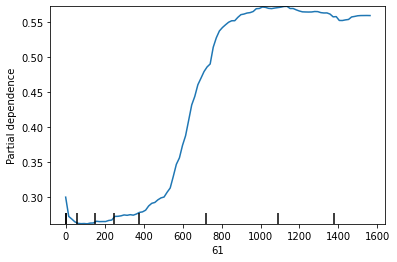

In [195]:
# Total time spent on website
PartialDependenceDisplay.from_estimator(best_random_forest_model, X_train, [61] )

In [204]:
# Occupation
lead_origin_pdp_values = []
lead_origin_strings = ['Businessman','Housewife', 'Other', 'Student', 'Unemployed', 'Working Professional']

In [205]:
# businessman
df_all_working_prof = pd.read_csv('/kaggle/input/leadscsv/Leads.csv')


# delete columns that have more than 3000 missing values
for i in df_all_working_prof.columns:
    if df_all_working_prof[i].isna().sum()>3000:
        df_all_working_prof.drop(i, axis=1, inplace=True)

df_all_working_prof['Lead Source'].fillna('Google', inplace=True)
df_all_working_prof['Lead Source'] = df_all_working_prof['Lead Source'].str.replace('google', 'Google')
df_all_working_prof['Lead Source'].unique()
df_all_working_prof['Last Activity'].fillna('Other', inplace=True)
df_all_working_prof['City'].fillna('Select', inplace=True)
df_all_working_prof.drop('City', axis=1, inplace=True)
df_all_working_prof['Specialization'].fillna('Select', inplace=True)
df_all_working_prof.drop('How did you hear about X Education', axis=1, inplace=True)
df_all_working_prof.drop('Country', axis=1, inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof.drop('Lead Profile', axis=1, inplace=True)
df_all_working_prof['What matters most to you in choosing a course'].fillna('Other', inplace=True)
df_all_working_prof['TotalVisits'].fillna(3, inplace=True)
df_all_working_prof['Page Views Per Visit'].fillna(2, inplace=True)

df_all_working_prof.columns = df_all_working_prof.columns.str.lower().str.replace(' ','_')
string_columns = list(df_all_working_prof.dtypes[df_all_working_prof.dtypes=='Object'].index)

for col in string_columns:
    df_all_working_prof[col] = df_all_working_prof[col].str.lower().str.replace(' ', '_')
    
train_full, test_X = train_test_split(df_all_working_prof, test_size=0.2, random_state=1)
train_y = train_full['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

categorical_df = df_all_working_prof.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = df_all_working_prof.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)


def calculate_mi(series):
    return mutual_info_score(series, df_all_working_prof['converted'])

data_mi = df_all_working_prof[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')


cat = list(data_mi.iloc[0:9,:].index) 
train_dict = train_full[cat+numerical].to_dict(orient='records')
for i in range (len(train_dict)):
    train_dict[i]['what_is_your_current_occupation'] = 'Businessman'
test_dict = test_X[cat+numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)

X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

y_pred = best_random_forest_model.predict(X_train)
pdp = sum(y_pred) / len(y_pred)
pdp
lead_origin_pdp_values.append(pdp)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [206]:
# Housewife
df_all_working_prof = pd.read_csv('/kaggle/input/leadscsv/Leads.csv')


# delete columns that have more than 3000 missing values
for i in df_all_working_prof.columns:
    if df_all_working_prof[i].isna().sum()>3000:
        df_all_working_prof.drop(i, axis=1, inplace=True)

df_all_working_prof['Lead Source'].fillna('Google', inplace=True)
df_all_working_prof['Lead Source'] = df_all_working_prof['Lead Source'].str.replace('google', 'Google')
df_all_working_prof['Lead Source'].unique()
df_all_working_prof['Last Activity'].fillna('Other', inplace=True)
df_all_working_prof['City'].fillna('Select', inplace=True)
df_all_working_prof.drop('City', axis=1, inplace=True)
df_all_working_prof['Specialization'].fillna('Select', inplace=True)
df_all_working_prof.drop('How did you hear about X Education', axis=1, inplace=True)
df_all_working_prof.drop('Country', axis=1, inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof.drop('Lead Profile', axis=1, inplace=True)
df_all_working_prof['What matters most to you in choosing a course'].fillna('Other', inplace=True)
df_all_working_prof['TotalVisits'].fillna(3, inplace=True)
df_all_working_prof['Page Views Per Visit'].fillna(2, inplace=True)

df_all_working_prof.columns = df_all_working_prof.columns.str.lower().str.replace(' ','_')
string_columns = list(df_all_working_prof.dtypes[df_all_working_prof.dtypes=='Object'].index)

for col in string_columns:
    df_all_working_prof[col] = df_all_working_prof[col].str.lower().str.replace(' ', '_')
    
train_full, test_X = train_test_split(df_all_working_prof, test_size=0.2, random_state=1)
train_y = train_full['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

categorical_df = df_all_working_prof.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = df_all_working_prof.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)


def calculate_mi(series):
    return mutual_info_score(series, df_all_working_prof['converted'])

data_mi = df_all_working_prof[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')


cat = list(data_mi.iloc[0:9,:].index) 
train_dict = train_full[cat+numerical].to_dict(orient='records')
for i in range (len(train_dict)):
    train_dict[i]['what_is_your_current_occupation'] = 'Housewife'
test_dict = test_X[cat+numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)

X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

y_pred = best_random_forest_model.predict(X_train)
pdp = sum(y_pred) / len(y_pred)
pdp
lead_origin_pdp_values.append(pdp)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [207]:
# Other
df_all_working_prof = pd.read_csv('/kaggle/input/leadscsv/Leads.csv')


# delete columns that have more than 3000 missing values
for i in df_all_working_prof.columns:
    if df_all_working_prof[i].isna().sum()>3000:
        df_all_working_prof.drop(i, axis=1, inplace=True)

df_all_working_prof['Lead Source'].fillna('Google', inplace=True)
df_all_working_prof['Lead Source'] = df_all_working_prof['Lead Source'].str.replace('google', 'Google')
df_all_working_prof['Lead Source'].unique()
df_all_working_prof['Last Activity'].fillna('Other', inplace=True)
df_all_working_prof['City'].fillna('Select', inplace=True)
df_all_working_prof.drop('City', axis=1, inplace=True)
df_all_working_prof['Specialization'].fillna('Select', inplace=True)
df_all_working_prof.drop('How did you hear about X Education', axis=1, inplace=True)
df_all_working_prof.drop('Country', axis=1, inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof.drop('Lead Profile', axis=1, inplace=True)
df_all_working_prof['What matters most to you in choosing a course'].fillna('Other', inplace=True)
df_all_working_prof['TotalVisits'].fillna(3, inplace=True)
df_all_working_prof['Page Views Per Visit'].fillna(2, inplace=True)

df_all_working_prof.columns = df_all_working_prof.columns.str.lower().str.replace(' ','_')
string_columns = list(df_all_working_prof.dtypes[df_all_working_prof.dtypes=='Object'].index)

for col in string_columns:
    df_all_working_prof[col] = df_all_working_prof[col].str.lower().str.replace(' ', '_')
    
train_full, test_X = train_test_split(df_all_working_prof, test_size=0.2, random_state=1)
train_y = train_full['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

categorical_df = df_all_working_prof.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = df_all_working_prof.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)


def calculate_mi(series):
    return mutual_info_score(series, df_all_working_prof['converted'])

data_mi = df_all_working_prof[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')


cat = list(data_mi.iloc[0:9,:].index) 
train_dict = train_full[cat+numerical].to_dict(orient='records')
for i in range (len(train_dict)):
    train_dict[i]['what_is_your_current_occupation'] = 'Other'
test_dict = test_X[cat+numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)

X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

y_pred = best_random_forest_model.predict(X_train)
pdp = sum(y_pred) / len(y_pred)
pdp
lead_origin_pdp_values.append(pdp)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [208]:
# Student
df_all_working_prof = pd.read_csv('/kaggle/input/leadscsv/Leads.csv')


# delete columns that have more than 3000 missing values
for i in df_all_working_prof.columns:
    if df_all_working_prof[i].isna().sum()>3000:
        df_all_working_prof.drop(i, axis=1, inplace=True)

df_all_working_prof['Lead Source'].fillna('Google', inplace=True)
df_all_working_prof['Lead Source'] = df_all_working_prof['Lead Source'].str.replace('google', 'Google')
df_all_working_prof['Lead Source'].unique()
df_all_working_prof['Last Activity'].fillna('Other', inplace=True)
df_all_working_prof['City'].fillna('Select', inplace=True)
df_all_working_prof.drop('City', axis=1, inplace=True)
df_all_working_prof['Specialization'].fillna('Select', inplace=True)
df_all_working_prof.drop('How did you hear about X Education', axis=1, inplace=True)
df_all_working_prof.drop('Country', axis=1, inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof.drop('Lead Profile', axis=1, inplace=True)
df_all_working_prof['What matters most to you in choosing a course'].fillna('Other', inplace=True)
df_all_working_prof['TotalVisits'].fillna(3, inplace=True)
df_all_working_prof['Page Views Per Visit'].fillna(2, inplace=True)

df_all_working_prof.columns = df_all_working_prof.columns.str.lower().str.replace(' ','_')
string_columns = list(df_all_working_prof.dtypes[df_all_working_prof.dtypes=='Object'].index)

for col in string_columns:
    df_all_working_prof[col] = df_all_working_prof[col].str.lower().str.replace(' ', '_')
    
train_full, test_X = train_test_split(df_all_working_prof, test_size=0.2, random_state=1)
train_y = train_full['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

categorical_df = df_all_working_prof.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = df_all_working_prof.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)


def calculate_mi(series):
    return mutual_info_score(series, df_all_working_prof['converted'])

data_mi = df_all_working_prof[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')


cat = list(data_mi.iloc[0:9,:].index) 
train_dict = train_full[cat+numerical].to_dict(orient='records')
for i in range (len(train_dict)):
    train_dict[i]['what_is_your_current_occupation'] = 'Student'
test_dict = test_X[cat+numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)

X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

y_pred = best_random_forest_model.predict(X_train)
pdp = sum(y_pred) / len(y_pred)
pdp
lead_origin_pdp_values.append(pdp)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [209]:
# Unemployed
df_all_working_prof = pd.read_csv('/kaggle/input/leadscsv/Leads.csv')


# delete columns that have more than 3000 missing values
for i in df_all_working_prof.columns:
    if df_all_working_prof[i].isna().sum()>3000:
        df_all_working_prof.drop(i, axis=1, inplace=True)

df_all_working_prof['Lead Source'].fillna('Google', inplace=True)
df_all_working_prof['Lead Source'] = df_all_working_prof['Lead Source'].str.replace('google', 'Google')
df_all_working_prof['Lead Source'].unique()
df_all_working_prof['Last Activity'].fillna('Other', inplace=True)
df_all_working_prof['City'].fillna('Select', inplace=True)
df_all_working_prof.drop('City', axis=1, inplace=True)
df_all_working_prof['Specialization'].fillna('Select', inplace=True)
df_all_working_prof.drop('How did you hear about X Education', axis=1, inplace=True)
df_all_working_prof.drop('Country', axis=1, inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof.drop('Lead Profile', axis=1, inplace=True)
df_all_working_prof['What matters most to you in choosing a course'].fillna('Other', inplace=True)
df_all_working_prof['TotalVisits'].fillna(3, inplace=True)
df_all_working_prof['Page Views Per Visit'].fillna(2, inplace=True)

df_all_working_prof.columns = df_all_working_prof.columns.str.lower().str.replace(' ','_')
string_columns = list(df_all_working_prof.dtypes[df_all_working_prof.dtypes=='Object'].index)

for col in string_columns:
    df_all_working_prof[col] = df_all_working_prof[col].str.lower().str.replace(' ', '_')
    
train_full, test_X = train_test_split(df_all_working_prof, test_size=0.2, random_state=1)
train_y = train_full['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

categorical_df = df_all_working_prof.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = df_all_working_prof.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)


def calculate_mi(series):
    return mutual_info_score(series, df_all_working_prof['converted'])

data_mi = df_all_working_prof[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')


cat = list(data_mi.iloc[0:9,:].index) 
train_dict = train_full[cat+numerical].to_dict(orient='records')
for i in range (len(train_dict)):
    train_dict[i]['what_is_your_current_occupation'] = 'Unemployed'
test_dict = test_X[cat+numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)

X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

y_pred = best_random_forest_model.predict(X_train)
pdp = sum(y_pred) / len(y_pred)
pdp
lead_origin_pdp_values.append(pdp)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [210]:
# Working Professional
df_all_working_prof = pd.read_csv('/kaggle/input/leadscsv/Leads.csv')


# delete columns that have more than 3000 missing values
for i in df_all_working_prof.columns:
    if df_all_working_prof[i].isna().sum()>3000:
        df_all_working_prof.drop(i, axis=1, inplace=True)

df_all_working_prof['Lead Source'].fillna('Google', inplace=True)
df_all_working_prof['Lead Source'] = df_all_working_prof['Lead Source'].str.replace('google', 'Google')
df_all_working_prof['Lead Source'].unique()
df_all_working_prof['Last Activity'].fillna('Other', inplace=True)
df_all_working_prof['City'].fillna('Select', inplace=True)
df_all_working_prof.drop('City', axis=1, inplace=True)
df_all_working_prof['Specialization'].fillna('Select', inplace=True)
df_all_working_prof.drop('How did you hear about X Education', axis=1, inplace=True)
df_all_working_prof.drop('Country', axis=1, inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof['What is your current occupation'].fillna('Other', inplace=True)
df_all_working_prof.drop('Lead Profile', axis=1, inplace=True)
df_all_working_prof['What matters most to you in choosing a course'].fillna('Other', inplace=True)
df_all_working_prof['TotalVisits'].fillna(3, inplace=True)
df_all_working_prof['Page Views Per Visit'].fillna(2, inplace=True)

df_all_working_prof.columns = df_all_working_prof.columns.str.lower().str.replace(' ','_')
string_columns = list(df_all_working_prof.dtypes[df_all_working_prof.dtypes=='Object'].index)

for col in string_columns:
    df_all_working_prof[col] = df_all_working_prof[col].str.lower().str.replace(' ', '_')
    
train_full, test_X = train_test_split(df_all_working_prof, test_size=0.2, random_state=1)
train_y = train_full['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

categorical_df = df_all_working_prof.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = df_all_working_prof.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)


def calculate_mi(series):
    return mutual_info_score(series, df_all_working_prof['converted'])

data_mi = df_all_working_prof[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')


cat = list(data_mi.iloc[0:9,:].index) 
train_dict = train_full[cat+numerical].to_dict(orient='records')
for i in range (len(train_dict)):
    train_dict[i]['what_is_your_current_occupation'] = 'Working Professional'
test_dict = test_X[cat+numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)

X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

y_pred = best_random_forest_model.predict(X_train)
pdp = sum(y_pred) / len(y_pred)
pdp
lead_origin_pdp_values.append(pdp)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


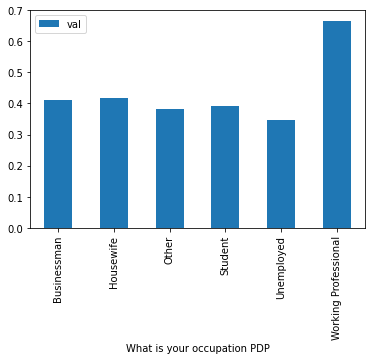

In [212]:
df = pd.DataFrame({'What is your occupation PDP': lead_origin_strings, 'val': lead_origin_pdp_values})
ax = df.plot.bar(x='What is your occupation PDP', y='val', rot=90)